# Benford's Analysis - State Elections India

This notebook was made to supplement one of my blogpost - [Benford's Law as a Fraud Detection technique](https://trigonaminima.github.io/data-analysis/fraud/2017/07/29/Benford's-Law-as-a-Fraud-Detection-technique/). Although, you'll be able to follow it along without reading the blogpost. You just need to know what Benford's law says. In this notebook, we'll see how to do a Benford's analysis and by doing so, we'll see if our dataset (historical temperatures of India) will follow the Benford's law.


## Index

1. [A basic exploration first](#exploration)
2. [Benford's Analysis](#benford)


## Dataset


My source of data was the mailing list I follow - [Data is Plural by Jeremy Singer-Vine](https://tinyletter.com/data-is-plural)

Five states in India, representing nearly 250 million residents — Punjab, Uttar Pradesh, Uttarakhand, Goa, and Manipur — have already held legislative assembly elections this year. India’s Election Commission publishes these results, but only as webpages. A couple of Hyderabad-based developers have scraped the website, and published CSVs of the [data on GitHub][1].

[1]: https://github.com/Vizbi/state-elections


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data_file = "Data/Indian State Elections 2016/All_States_Constituencies_combined_2017.csv"
data = pd.read_csv(data_file)
data.head()

,Candidate,Party,Votes,Constituency,State
0,DR. PRAMOD PANDURANG SAWANT,Bharatiya Janata Party,10058,Sanquelim,Goa
1,DHARMESH SAGLANI,Indian National Congress,7927,Sanquelim,Goa
2,SURESH AMONKAR,Goa Suraksha Manch,3831,Sanquelim,Goa
3,PRATAP PRABHAKAR GAUNS,Nationalist Congress Party,857,Sanquelim,Goa
4,MILIND GAUNS,Aam Aadmi Party,408,Sanquelim,Goa


<a id="exploration"></a>
## A basic exploration first

In [5]:
data.shape

(7849, 5)

That's okayish number of rows. Not that great.

#### States

In [8]:
[i for i in data.State.unique()]

['Goa', 'Manipur', 'Punjab', 'Uttarakhand', 'Uttar Pradesh']

So, as the data description says, there all 5 states in the dataset. Goa is in Western India, Manipur in Eastern, and rest are in Northern part of India.

#### Political Parties

In [9]:
data.Party.unique()

array(['Bharatiya Janata Party', 'Indian National Congress',
       'Goa Suraksha Manch', 'Nationalist Congress Party',
       'Aam Aadmi Party', 'Independent', 'Goa Su-Raj Party',
       'None of the Above', 'Maharashtrawadi Gomantak',
       'Samajwadi Janata Party (ChandraShekhar)', 'Goa Forward Party',
       'Communist Party of India', 'Shivsena',
       'Niz Goenkar Revolution Front', 'Goa Vikas Party',
       'United Goans Party', 'Goa Praja Party', 'Bahujan Mukti Party',
       'Ambedkarite Party of India', 'Manipur National Democratic Front',
       "National People's Party", 'Lok Jan Shakti Party',
       'All India Trinamool Congress', 'Naga Peoples Front',
       'North East India Development Party', 'Manipur People’s Party',
       'Republican Party of India (A)',
       'Peoples Resurgence and Justice Alliance', 'All India Forward Bloc',
       'Communist Party of India  (Marxist)',
       "People's Democratic Alliance",
       "Manipur Democratic Peoples's Front", 'Lok I

Holy shit! Don't expand that cell! That's a lot of political parties. I only knew a few of them. The major ones. Most of them must be alliances. And these are just 5 states. These are a lot of big states not in this list. I wonder how many political parties would there be in whole india.

#### Votes

In [26]:
data.Votes.describe()

count      7849.000000
mean      13981.559562
std       26560.548606
min          20.000000
25%         465.000000
50%        1023.000000
75%        9491.000000
max      262741.000000
Name: Votes, dtype: float64

The votes vary a lot. From 20 Votes (in state Goa. Feeling bad for the Candidate :/),they go up to 260K (in state Uttar Pradesh. Dayum dude! Nailed it).

In [47]:
data[(data.Votes==data.Votes.max()) | (data.Votes==data.Votes.min())]

,Candidate,Party,Votes,Constituency,State
227,PARSHURAM DODAMANI,Independent,20,Panaji,Goa
6259,SUNIL KUMAR SHARMA,Bharatiya Janata Party,262741,Sahibabad,Uttar Pradesh


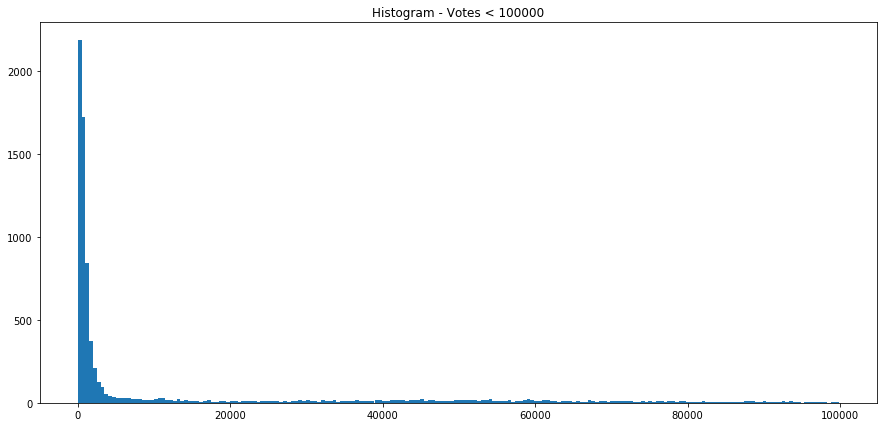

In [24]:
plt.figure(figsize=(15, 7))
plt.hist(data.Votes[data.Votes < 100000], bins=200)
plt.title("Histogram - Votes < 100000")
plt.show()

Pretty, right-skewed Histogram with a long tail, above kind of hints that Benford's law is being followed by the data.

<a id="benford"></a>
## 2. Benford's Analysis

First digit frequencies-

1    26.933367
2    13.606829
3    11.504650
4    10.370748
5    10.141419
6     8.752707
7     6.956300
8     6.179131
9     5.554848
Name: Votes, dtype: float64


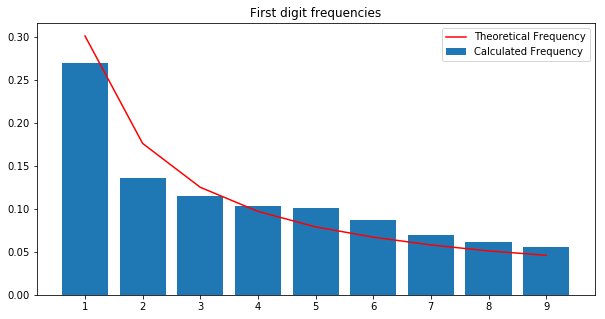

In [4]:
# First digit frequencies
freq = data.Votes.astype(str).str.replace("-", "").str.lstrip("0").str.lstrip(".").str.lstrip("0").str[0].value_counts()
freq = freq/data.shape[0]
print("First digit frequencies-\n")
print(freq.sort_index()*100)

# First frequency digit plot
plt.figure(figsize=(10,5))
plt.bar(freq.index.astype(int), freq, label='Calculated Frequency')
plt.plot(range(1, 10), [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046], c='red', label='Theoretical Frequency')
plt.legend(loc='upper right')
plt.title("First digit frequencies")
plt.xticks(freq.index.astype(int))
plt.show()

As expected, it does follow the trend. Althouh, there are still hiccups here and there (1st and 2nd digit), but it follows the trend pretty closely.

It ought to follow the trend. Polulation data are found to follow the Benford's law, and our Votes data is *kind of* population data - Adult population who went to cast a vote on the election day. Good enough.
